### Centrality
* Mean 
* Median
* Mode

### Variability
* Variance ($\sigma^2$): Measurement of the spread between numbers in a data set  
* Standard deviation ($\sigma$): square root of the variance

True population variance: $ \sigma^2 = \frac{\sum{\left(x-\mu\right)^2}}{N} $    
Unbiased sample variance: $ \sigma^2 = \frac{\sum{\left(x-\bar{x}\right)^2}}{n-1} $    
Biased sample variance: $ \sigma^2 = \frac{\sum{\left(x-\bar{x}\right)^2}}{n} $

We typically want the unbiased sample variance

In [89]:
def calc_mean(x, n):
    return sum(x)/n

def calc_var(x, n):
    '''
    Calculate variance using numpy array x
    '''
    mean = calc_mean(x,n)
    return sum(np.power(x-mean,2))/n

def calc_var_list(x, n):
    '''
    Calculate variance using list x
    '''
    mean = sum(x)/n
    return sum( pow(el - mean,2) for el in x )/n

In [92]:
nums = [1, 2, 3, 4, 5]
nums_arr = np.array(nums)
print(f'Variance calculated using a numpy array: {calc_var(nums_arr, len(nums_arr))}')
print(f'Variance calculated using a list : {calc_var_list(nums, len(nums))}')

Variance calculated using a numpy array: 2.0
Variance calculated using a list : 2.0


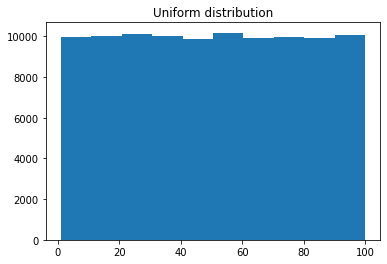

Popluation true mean: 50.47, calculated: 50.47
Popluation true variance: 833.32, calculated: 833.32


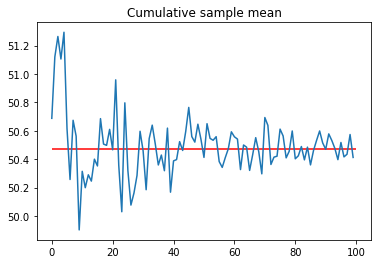

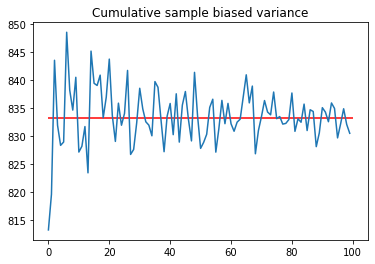

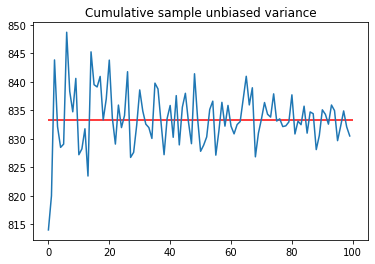

In [85]:
import numpy as np
from matplotlib import pyplot as plt

N = 100000 # population size
population =  np.random.randint(1, 101, N)
true_mean = calc_mean(population, N)
true_var  = calc_var(population, N)
plt.title('Uniform distribution')
plt.hist(population)
plt.show()
print(f'Popluation true mean: {population.mean():.2f}, calculated: {true_mean:.2f}')
print(f'Popluation true variance: {population.var():.2f}, calculated: {true_var:.2f}')

cum_mean_var = {'mean': [], 'var': [], 'var_unb': []}

for i in range(100):
    pop = np.random.choice(population, int((i+1)/100 * N))
    cum_mean_var['mean'].append(calc_mean(pop, len(pop)))
    cum_mean_var['var'].append(calc_var(pop, len(pop)))
    cum_mean_var['var_unb'].append(calc_var(pop, len(pop)-1))
plt.plot(cum_mean_var['mean'])
plt.title('Cumulative sample mean')
plt.hlines(true_mean, 0,100, colors='r')
plt.show()
plt.title('Cumulative sample biased variance')
plt.plot(cum_mean_var['var'])
plt.hlines(true_var, 0,100, colors='r')
plt.show()
plt.title('Cumulative sample unbiased variance')
plt.plot(cum_mean_var['var_unb'])
plt.hlines(true_var, 0,100, colors='r')
plt.show()

I don't see a clear distinction between biased (/n) and unbiased (/(n-1))sample variance. 